# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

In [ ]:
# Get the empty lists to store the values of each
country = []
city_list = []
date = []
max_temperature = []
cloudiness = []
humidity = []
latitude = []
longitude = []
wind_speed = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
print("Beginning Data Retrieval")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Create a loop for all cities
i = 1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q" + city
    response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='
                                   f'{city}&units=imperial').json()
    
    try:
        country.append(response["sys"]["country"])
        city_list.append(response["name"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record : {i}|{city}") 
        i+=1
  
    except(KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# country = []
# city_list = []
# date = []
# max_temperature = []
# cloudiness = []
# humidity = []
# latitude = []
# longitude = []
# wind_speed = []
weather_df = pd.DataFrame ({
    "Country" : country,
    "City" : city_list,
    "Date" : date,
    "Max Temp" : max_temperature,
    "Cloudiness" : cloudiness,
    "Humidity" : humidity,
    "Lat" : latitude,
    "Lng" : longitude,
    "Wind Speed" : wind_speed 
})
weather_df

In [ ]:
weather_df.count()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

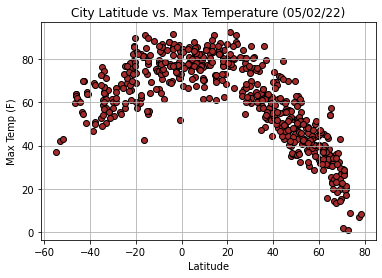

In [60]:
# Create scatter plot Latitude vs. Temperature Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "brown", edgecolor = "black")

plt.grid()

plt.title("City Latitude vs. Max Temperature (05/02/22)")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_files/LatvsTempplot")

plt.show()

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

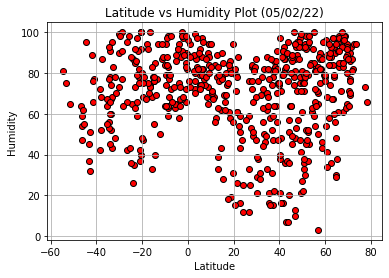

In [59]:
# Create scatter plot Latitude vs. Humidity Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "red", edgecolor = "black")

plt.grid()

plt.title("Latitude vs Humidity Plot (05/02/22)")

plt.xlabel("Latitude")

plt.ylabel("Humidity")

plt.savefig("../output_files/LatvsHumidity")

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

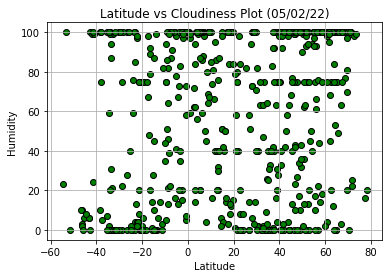

In [61]:
# Create scatter plot Latitude vs. Cloudiness Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "green", edgecolor = "black")

plt.grid()

plt.title("Latitude vs Cloudiness Plot (05/02/22)")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

plt.savefig("../output_files/LatvsCloudiness")

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

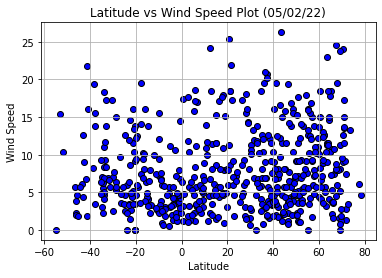

In [62]:
# Create scatter plot Latitude vs. Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "blue", edgecolor = "black")

plt.grid()

plt.title("Latitude vs Wind Speed Plot (05/02/22)")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

plt.savefig("../output_files/LatvsWindSpeed")

plt.show

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression